# Policy Experiments Analysis
In short, there are three policy options that will be applied to the base case: everyone gets subsidy (effectively making the measures all cheaper), you get subsidy based on your income and you get subsidy based on location/flood depth. The data produced in PolicyExperiments.ipynb is loaded into a dataframe and further analysed. The results are elaborated on in the report. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

experiments_file_path = r'../output_data/PolicyExperimentsModelVars.csv'
experiments = pd.read_csv(experiments_file_path)
#experiments


,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,subsidies_package,TotalAdaptedHouseholds,TotalActualDamage,...,EstimatedAverageDamagePerRichHousehold,EstimatedAverageIncomeToDamagePoorHousehold,EstimatedAverageIncomeToDamageMiddleClassHousehold,EstimatedAverageIncomeToDamageRichHousehold,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold
0,0,0,0,1000,80,100yr,watts_strogatz,0,0,0.000000e+00,...,95931.601184,3.523539,1.102154,1.087141,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,1,1000,80,100yr,watts_strogatz,0,71,0.000000e+00,...,83577.367807,3.523539,1.032775,0.947138,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0,0,2,1000,80,100yr,watts_strogatz,0,156,0.000000e+00,...,77505.649975,3.400726,0.893025,0.878330,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,0,3,1000,80,100yr,watts_strogatz,0,209,0.000000e+00,...,68397.893550,3.233942,0.778391,0.775117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0,0,4,1000,80,100yr,watts_strogatz,0,230,0.000000e+00,...,65164.397038,3.151198,0.744400,0.738473,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15657,399,99,12,1000,80,100yr,watts_strogatz,3,282,0.000000e+00,...,39546.472199,1.592474,0.553200,0.465313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15658,399,99,13,1000,80,100yr,watts_strogatz,3,284,0.000000e+00,...,39546.472199,1.497700,0.553200,0.465313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15659,399,99,14,1000,80,100yr,watts_strogatz,3,288,0.000000e+00,...,39546.472199,1.425075,0.543318,0.465313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
15660,399,99,15,1000,80,100yr,watts_strogatz,3,290,0.000000e+00,...,39546.472199,1.398201,0.537338,0.465313,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [3]:
#Define intervals
intervals = [0, 20, 40, 60, 80]
custom_labels = ['0-5 yr', '5-10 yr', '10-15 yr', '15-20yr']

#The results final dataframe only records the values of the variables when a flood occurred. 
results_between = experiments.copy()

#Therefore we cut out the steps where the flood has not yet occurred.
results_final = results_between[results_between['TotalActualDamage'] != 0]

# Create a new column representing the clusters
results_final['Cluster'] = pd.cut(results_final['Step'], bins=intervals, labels=custom_labels)
#Make separate dataframes for each experiment
package_1 = results_final[results_final['subsidies_package'] == 1]
package_2 = results_final[results_final['subsidies_package'] == 2]
package_3 = results_final[results_final['subsidies_package'] == 3]
no_subsidy = results_final[results_final['subsidies_package'] == 0]

#To check if it worked
package_1

/var/folders/n2/060btgx92fg7n1_kykfzg5880000gn/T/ipykernel_39243/1891741664.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_final['Cluster'] = pd.cut(results_final['Step'], bins=intervals, labels=custom_labels)


,RunId,iteration,Step,number_of_households,number_of_steps,flood_map_choice,network,subsidies_package,TotalAdaptedHouseholds,TotalActualDamage,...,EstimatedAverageIncomeToDamagePoorHousehold,EstimatedAverageIncomeToDamageMiddleClassHousehold,EstimatedAverageIncomeToDamageRichHousehold,AverageDamagePerPoorHousehold,AverageDamagePerMiddleClassHousehold,AverageDamagePerRichHousehold,AverageIncomeToDamagePoorHousehold,AverageIncomeToDamageMiddleClassHousehold,AverageIncomeToDamageRichHousehold,Cluster
32,1,0,11,1000,80,100yr,watts_strogatz,1,186,2.499145e+07,...,2.642319,0.907379,0.658642,12818.934490,24882.096676,52342.947217,2.466515,0.853777,0.592000,0-5 yr
182,5,1,1,1000,80,100yr,watts_strogatz,1,82,2.727775e+07,...,3.072369,1.017408,0.697143,13844.712903,28460.804687,56907.845092,2.865592,0.952514,0.645391,0-5 yr
393,9,2,32,1000,80,100yr,watts_strogatz,1,229,1.958197e+07,...,2.470086,0.710937,0.419836,12033.246982,19735.223010,33974.780843,2.313255,0.666644,0.378715,5-10 yr
624,13,3,75,1000,80,100yr,watts_strogatz,1,292,1.290998e+07,...,2.180666,0.424733,0.369013,9977.986116,11520.526280,29590.915981,2.006815,0.399169,0.349855,15-20yr
739,17,4,45,1000,80,100yr,watts_strogatz,1,297,1.430503e+07,...,2.217024,0.492721,0.357866,10507.146966,13420.061153,28058.385882,2.078186,0.449093,0.322960,10-15 yr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15160,381,95,26,1000,80,100yr,watts_strogatz,1,216,1.718808e+07,...,2.689099,0.636911,0.331497,12705.442356,17114.916186,26958.919687,2.518852,0.587829,0.310341,5-10 yr
15263,385,96,16,1000,80,100yr,watts_strogatz,1,191,2.381997e+07,...,2.867246,0.855836,0.624631,13158.388298,24087.860969,48951.260248,2.680937,0.805633,0.580970,0-5 yr
15348,389,97,3,1000,80,100yr,watts_strogatz,1,128,2.570280e+07,...,3.081623,0.865848,0.760836,14590.685257,23521.625981,63336.869951,2.877937,0.815626,0.717995,0-5 yr
15512,393,98,42,1000,80,100yr,watts_strogatz,1,287,1.585339e+07,...,2.545967,0.473254,0.497610,11777.654986,13124.146752,40220.000124,2.375858,0.444435,0.463494,10-15 yr


<Axes: xlabel='Time', ylabel='No subsidy'>

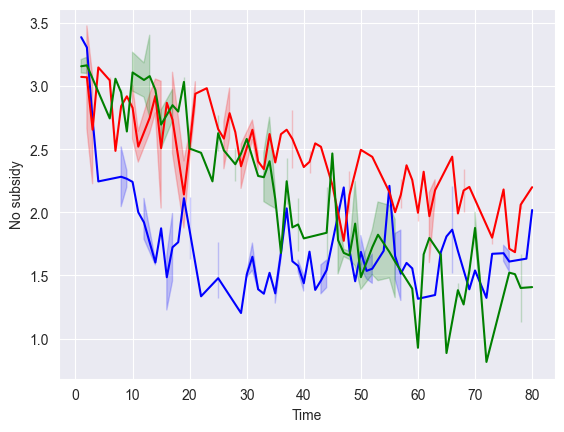

In [96]:
#Create a new dataframe
experiment_data = pd.DataFrame({
    'Time': experiments['Step'],
    'No subsidy': no_subsidy['EstimatedAverageIncomeToDamagePoorHousehold'],
    'Package 1': package_1['EstimatedAverageIncomeToDamagePoorHousehold'],
    'Package 2': package_2['EstimatedAverageIncomeToDamagePoorHousehold'],
    'Package 3': package_3['EstimatedAverageIncomeToDamagePoorHousehold']
})

#Create a line for every column in the dataframe
sns.lineplot(x='Time', y='No subsidy', data=experiment_data, color= 'blue')
sns.lineplot(x='Time', y='Package 1', data=experiment_data, color= 'red')
sns.lineplot(x='Time', y='Package 2', data=experiment_data, color = 'green')


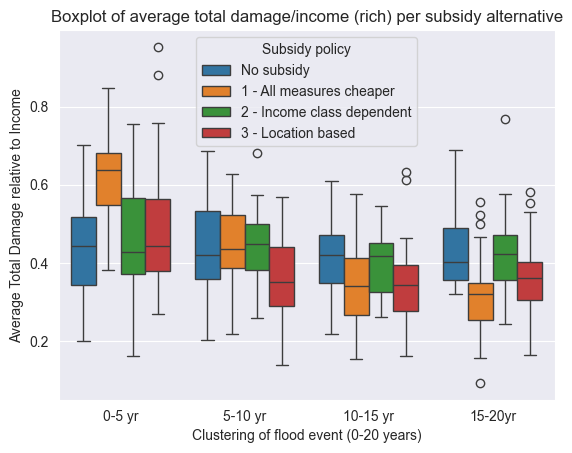

In [97]:
#RICH
# Assuming 'data' is your DataFrame with damage columns for each income class
# Replace this line with your actual DataFrame
data_experiments1 = pd.DataFrame({
    'Flood event': results_final['Cluster'],
    'No subsidy': no_subsidy['AverageIncomeToDamageRichHousehold'],
    '1 - All measures cheaper': package_1['AverageIncomeToDamageRichHousehold'],
    '2 - Income class dependent': package_2['AverageIncomeToDamageRichHousehold'], 
    '3 - Location based': package_3['AverageIncomeToDamageRichHousehold']
})

# Reshape the DataFrame to long format
melted2_data = pd.melt(data_experiments1, id_vars=['Flood event'], var_name='Subsidy policy', value_name='total_damage')

# Create the boxplot using Seaborn
sns.boxplot(x=melted2_data['Flood event'], y=melted2_data['total_damage'], hue=melted2_data['Subsidy policy'])

plt.title('Boxplot of average total damage/income (rich) per subsidy alternative')
plt.xlabel('Clustering of flood event (0-20 years)')
plt.ylabel('Average Total Damage relative to Income')

output_path_experiments1 = r'../result_figures/Rich_Boxplot_Experiments.png'
plt.savefig(output_path_experiments1)
plt.show()

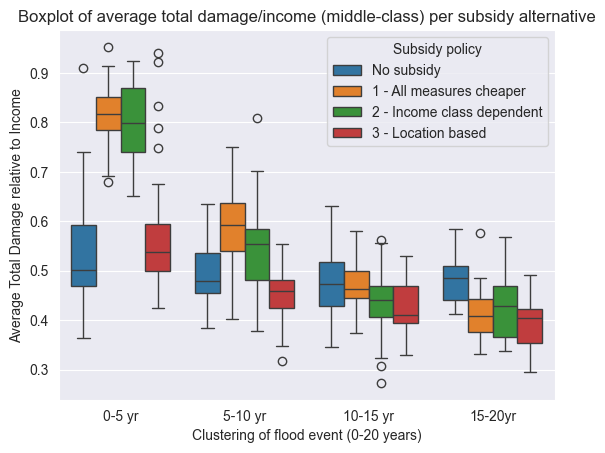

In [98]:
#MIDDLE-CLASS
# Assuming 'data' is your DataFrame with damage columns for each income class
# Replace this line with your actual DataFrame
data_experiments2 = pd.DataFrame({
    'Flood event': results_final['Cluster'],
    'No subsidy': no_subsidy['AverageIncomeToDamageMiddleClassHousehold'],
    '1 - All measures cheaper': package_1['AverageIncomeToDamageMiddleClassHousehold'],
    '2 - Income class dependent': package_2['AverageIncomeToDamageMiddleClassHousehold'], 
    '3 - Location based': package_3['AverageIncomeToDamageMiddleClassHousehold']
})

# Reshape the DataFrame to long format
melted2_data = pd.melt(data_experiments2, id_vars=['Flood event'], var_name='Subsidy policy', value_name='total_damage')

# Create the boxplot using Seaborn
sns.boxplot(x=melted2_data['Flood event'], y=melted2_data['total_damage'], hue=melted2_data['Subsidy policy'])

plt.title('Boxplot of average total damage/income (middle-class) per subsidy alternative')
plt.xlabel('Clustering of flood event (0-20 years)')
plt.ylabel('Average Total Damage relative to Income')

output_path_experiments2 = r'../result_figures/Middle_Boxplot_Experiments.png'
plt.savefig(output_path_experiments2)
plt.show()

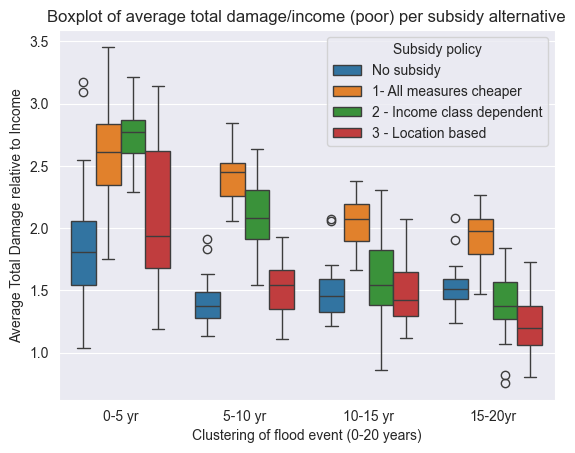

In [99]:
##POOOOOR
# Assuming 'data' is your DataFrame with damage columns for each income class
# Replace this line with your actual DataFrame
data_experiments3 = pd.DataFrame({
    'Flood event': results_final['Cluster'],
    'No subsidy': no_subsidy['AverageIncomeToDamagePoorHousehold'],
    '1- All measures cheaper': package_1['AverageIncomeToDamagePoorHousehold'],
    '2 - Income class dependent': package_2['AverageIncomeToDamagePoorHousehold'], 
    '3 - Location based': package_3['AverageIncomeToDamagePoorHousehold']
})

# Reshape the DataFrame to long format
melted2_data = pd.melt(data_experiments3, id_vars=['Flood event'], var_name='Subsidy policy', value_name='total_damage')

# Create the boxplot using Seaborn
sns.boxplot(x=melted2_data['Flood event'], y=melted2_data['total_damage'], hue=melted2_data['Subsidy policy'])

plt.title('Boxplot of average total damage/income (poor) per subsidy alternative')
plt.xlabel('Clustering of flood event (0-20 years)')
plt.ylabel('Average Total Damage relative to Income')

output_path_experiments3 = r'../result_figures/Poor_Boxplot_Experiments.png'
plt.savefig(output_path_experiments3)
plt.show()


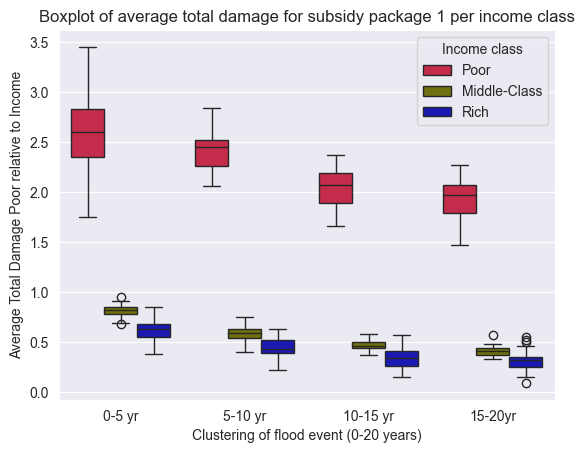

In [100]:
#Influence on income labels per policy type: PACKAGE 1
import pandas as pd 

data_experiments4 = pd.DataFrame({
    'Flood event': package_1['Cluster'],
    'Poor': package_1['AverageIncomeToDamagePoorHousehold'],
    'Middle-Class': package_1['AverageIncomeToDamageMiddleClassHousehold'],
    'Rich': package_1['AverageIncomeToDamageRichHousehold'], 
})

# Reshape the DataFrame to long format
melted2_data = pd.melt(data_experiments4, id_vars=['Flood event'], var_name='Income class', value_name='total_damage')

# Create the boxplot using Seaborn
sns.boxplot(x=melted2_data['Flood event'], y=melted2_data['total_damage'], hue=melted2_data['Income class'], palette=["crimson","olive","mediumblue"])

plt.title('Boxplot of average total damage for subsidy package 1 per income class')
plt.xlabel('Clustering of flood event (0-20 years)')
plt.ylabel('Average Total Damage Poor relative to Income')

output_path_experiments3 = r'../result_figures/Package1_Boxplot_Experiments.png'
plt.savefig(output_path_experiments3)
plt.show()


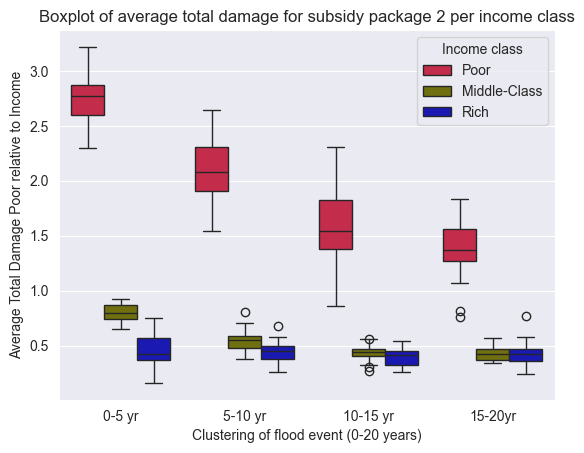

In [101]:
#Influence on income labels per policy type: PACKAGE 2
import pandas as pd 

data_experiments4 = pd.DataFrame({
    'Flood event': package_2['Cluster'],
    'Poor': package_2['AverageIncomeToDamagePoorHousehold'],
    'Middle-Class': package_2['AverageIncomeToDamageMiddleClassHousehold'],
    'Rich': package_2['AverageIncomeToDamageRichHousehold'], 
})

# Reshape the DataFrame to long format
melted2_data = pd.melt(data_experiments4, id_vars=['Flood event'], var_name='Income class', value_name='total_damage')

# Create the boxplot using Seaborn
sns.boxplot(x=melted2_data['Flood event'], y=melted2_data['total_damage'], hue=melted2_data['Income class'], palette=["crimson","olive","mediumblue"])

plt.title('Boxplot of average total damage for subsidy package 2 per income class')
plt.xlabel('Clustering of flood event (0-20 years)')
plt.ylabel('Average Total Damage Poor relative to Income')

output_path_experiments3 = r'../result_figures/Package2_Boxplot_Experiments.png'
plt.savefig(output_path_experiments3)
plt.show()

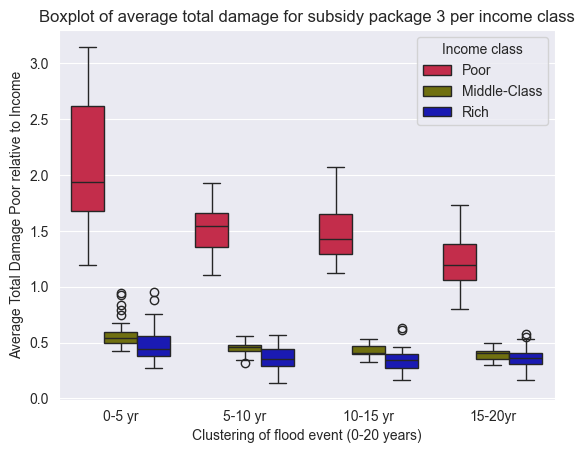

In [102]:
#Influence on income labels per policy type: PACKAGE 3
import pandas as pd 

data_experiments4 = pd.DataFrame({
    'Flood event': package_3['Cluster'],
    'Poor': package_3['AverageIncomeToDamagePoorHousehold'],
    'Middle-Class': package_3['AverageIncomeToDamageMiddleClassHousehold'],
    'Rich': package_3['AverageIncomeToDamageRichHousehold'], 
})

# Reshape the DataFrame to long format
melted2_data = pd.melt(data_experiments4, id_vars=['Flood event'], var_name='Income class', value_name='total_damage')

# Create the boxplot using Seaborn
sns.boxplot(x=melted2_data['Flood event'], y=melted2_data['total_damage'], hue=melted2_data['Income class'], palette=["crimson","olive","mediumblue"])

plt.title('Boxplot of average total damage for subsidy package 3 per income class')
plt.xlabel('Clustering of flood event (0-20 years)')
plt.ylabel('Average Total Damage Poor relative to Income')

output_path_experiments3 = r'../result_figures/Package3_Boxplot_Experiments.png'
plt.savefig(output_path_experiments3)
plt.show()

16463682.901689276